## Wydobywanie krawędzi z obrazu

Celem tego zadania jest uzyskanie jak największej metryki IoU (Intersection over Union), poprzez dobór odpowiednich maski i/lub progowania obrazu w zadaniu wydobywania krawędzi z obrazu mikroskopowego śródbłonka rogówki. Dodatkowo można spróbować wykorzystać filtry w stylu `min`, `max`, `median` w celu oczyszczenia maski z szumów.
Warto też zapoznać się z biblioteką `skimage.morphology` oraz takimi operacjami jak `closing`, `opening`, `dilatation`, `erosion`.

W folderze `dane` znajdują się trzy obrazy: `image.png`, `mask.png`, `roi.png`. Obraz `image.png` jest obrazem mikroskopowym śródbłonka rogówki. Obraz `mask.png` zawiera maskę krawędzi, które zostały ręcznie zaznaczone na obrazie `image.png`. Obraz `roi.png` zawiera maskę obszaru zainteresowania, który zawiera krawędzie. Metryka IoU jest obliczana tylko w obszarze zainteresowania.

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


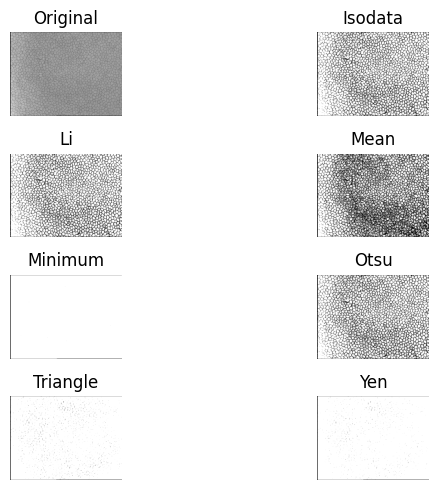

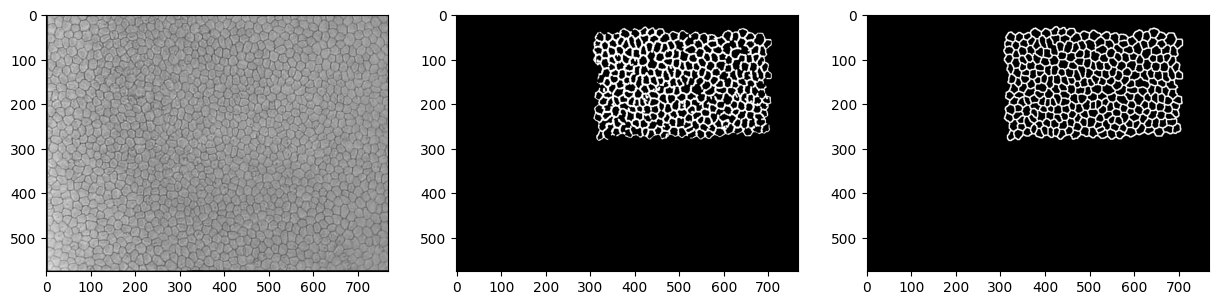

IoU (Intersection over Union): 0.7275066861785335


In [124]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, io, filters, morphology, util
import scipy.ndimage as ndi

image = io.imread("dane-4/image.png", as_gray=True)
mask = io.imread("dane-4/mask.png", as_gray=True)
roi = io.imread("dane-4/roi.png", as_gray=True)


def IoU(x: np.ndarray, y: np.ndarray, roi: np.ndarray = None) -> float:
    assert x.shape == y.shape

    if roi is not None:
        x = x * roi
        y = y * roi

    intersection = np.logical_and(x, y).sum()
    if intersection == 0:
        return 0
    union = np.logical_or(x, y).sum()
    if union == 0:
        return 0
    return intersection / union

def extract_edges(x: np.ndarray) -> np.ndarray:
    filters.try_all_threshold(x)
    threshold = filters.threshold_li(x)
    x = x>threshold
    x = util.invert(x)
    x = morphology.remove_small_objects(x,min_size=20)
    x = morphology.binary_dilation(x,morphology.disk(1))
    return x

edges = extract_edges(image)

plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(131)
plt.imshow(image, cmap="gray")
plt.subplot(132)
plt.imshow(edges*roi, cmap="gray")
plt.subplot(133)
plt.imshow(mask, cmap="gray")
plt.show()

print("IoU (Intersection over Union):", IoU(edges, mask, roi))
